In [ ]:
from modules.spektron import *

s = BaseStructure()

s.v.displaySymbols()
input_data = s.v.generateInputData(2)

for i in input_data:
    print(i)


Time domain symbols
indice symbol pattern
0 0 [105, 220, 23, 99, 266, 190, 37, 5]
1 1 [334, 174, 134, -7, 19, 155, 93, 89]
2 2 [72, 96, 102, 151, -14, 171, 127, 127]
3 3 [15, 38, 283, 204, 232, 141, 121, 47]
4 4 [157, -60, 54, 54, 69, -27, -14, 101]
5 5 [0, 113, 74, 176, 68, 322, 135, 367]
6 6 [56, 114, 126, 181, 93, 41, 118, 76]
7 7 [164, 200, 351, 51, 36, 163, 298, -5]
8 8 [140, 124, 99, 34, -46, -5, 240, 136]
9 9 [113, 58, 130, 123, 171, 143, 109, 17]
10 + [-8, 299, 65, 62, 130, 146, -43, 23]
11 - [-96, 212, 56, 150, -55, 150, 151, 70]
12 * [-22, 148, 219, 62, 108, 136, 198, 126]
13 / [220, 84, 165, 167, 1, 227, 15, 144]
14 = [200, 135, 165, 64, 100, 224, 244, 140]
15 ? [21, 183, -161, 65, 33, 257, -16, 112]
0 [334, -18, 101, 207, -81, -53, 53, 22]
1 [350, 98, 190, -4, 113, 99, -96, 2]
2 [294, 3, -42, -48, -16, -34, -130, 0]
3 [382, 0, -217, 102, -16, 55, 64, 52]
4 [118, 26, -5, -22, 153, 0, 67, -81]
5 [443, -187, -68, -56, -79, -72, -179, -164]
6 [284, 52, -68, -29, -41, -38, 36, 2

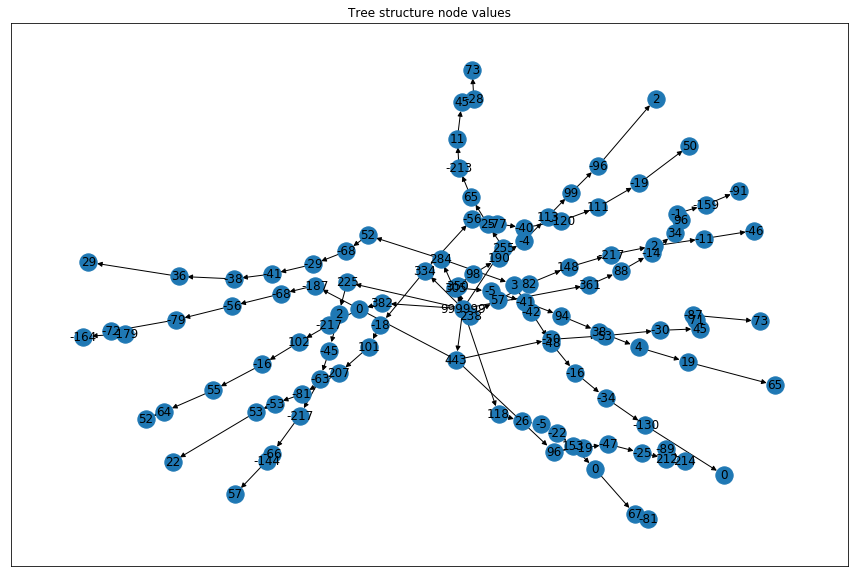

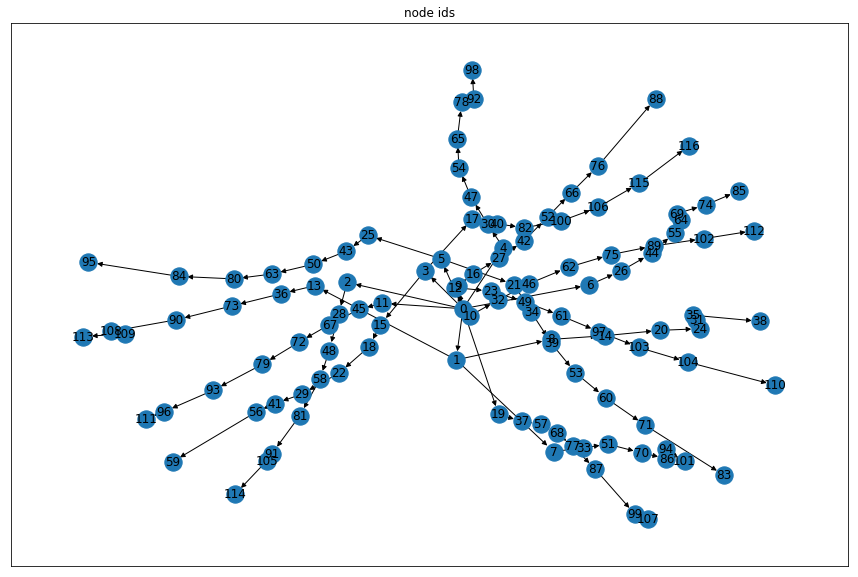

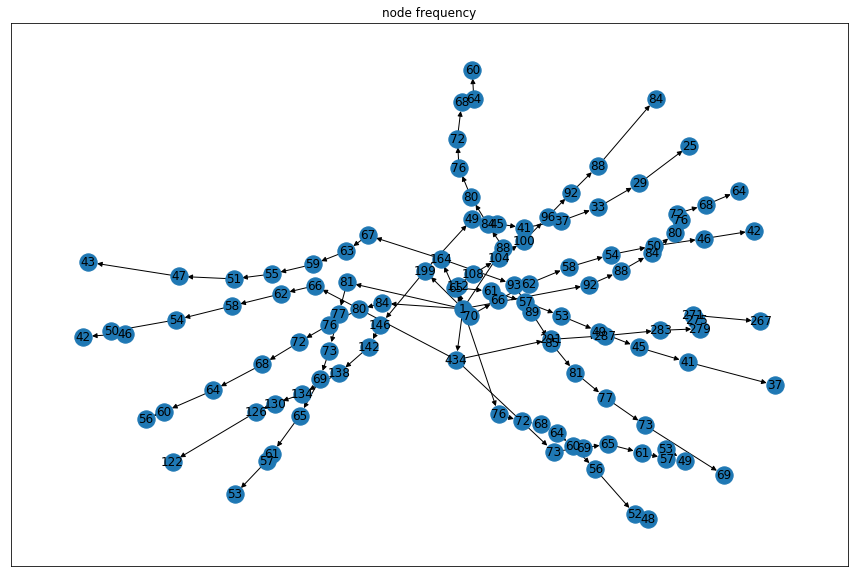

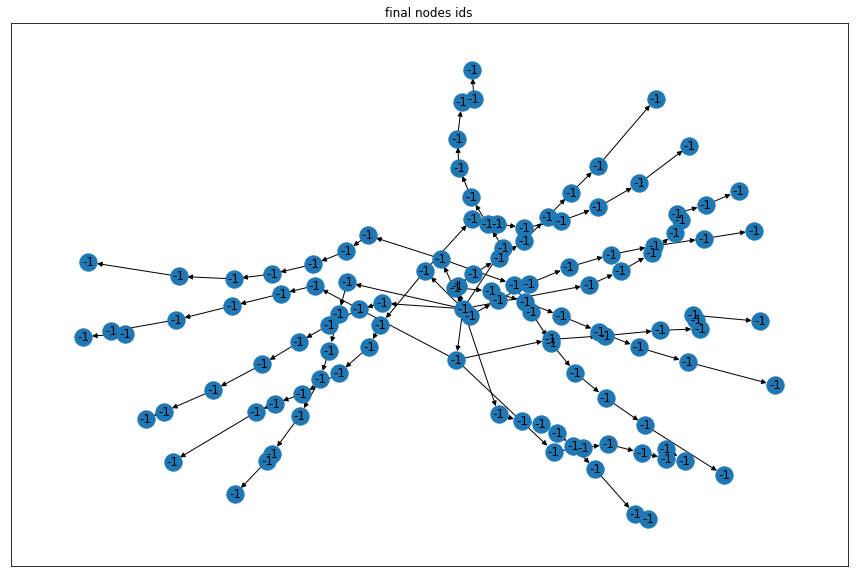

In [2]:
from modules.spektron import *

def specialTrain():
    # feed system with data
    for i in range(20):
        for data in input_data[:5]:
            #print(data)
            s.addBranchEntropy(data)
    for data in input_data[5:10]:
            #print(data)
            s.addBranchEntropy(data)


s = BaseStructure("wavelet domain")

print("Time domain symbols")
s.v.displaySymbols()

for i in range(16):
    print(i, s.v.getWaveletCoefs(s.v.symbols[i]))
# change all symbols to wavelet domain
#print("Wavelet domain symbols")
#s.v.symbolsToWavelet()
#s.v.displaySymbols()

input_data = s.v.generateInputData(500)

#s.v.decodeTrainOperations(input_data)

#print(s.v.genData(["normal",0,10,16],show=True))

for data in input_data:
    s.addBranchEntropy(data)
# #s.agCizdir()
s.plotGraph( )

# nei = list(s.agac.neighbors(0))
# count = 0
# for n in nei:
#     print(count, s.agac.node[n]['value'],  s.agac.node[n]['occurance_count'] )
#     count+=1
